# **AtliQ Hotels Data Analysis Project**

> AtliQ Hotels, a luxury hotel chain in India with locations in Mumbai, Delhi, Hyderabad, and Bangalore, is experiencing a decline in business. To address this issue, they have provided a dataset covering three months from May 2022 to July 2022 for analysis, along with separate data for August 2022. 

> This notebook aims to analyze the data and deliver insights based on the findings.

- Data Import and Data Exploration

- Data Cleaning

- Data Transformation

- Insights Generation

### **Importing Necessary Libraries.**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings.csv
   - fact_bookings.csv

#### *Load the bookings data into a dataframe.*

In [11]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

#### *Explore the booking dataset using the`Head()` function.*

In [12]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


#### *Determining the total count of rows and columns using the `Shape()` function.*

In [13]:
df_bookings.shape

(134590, 12)

#### *Lists the distinct room categories found in the bookings data using the `Unique()` function.*

In [14]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

#### *Lists the unique booking platforms available in the bookings dataset using the `Unique()` function.*

In [15]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

#### *Counts the number of bookings per platform in the bookings dataset using the `Value_counts()` function.*

In [16]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

#### *Generates a bar chart showing the distribution of booking platforms in the dataset using the `Plot()` function.*

<Axes: xlabel='booking_platform'>

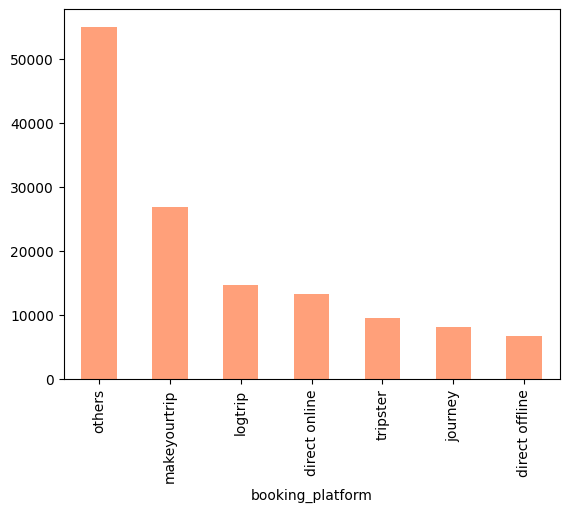

In [183]:
df_bookings.booking_platform.value_counts().plot(kind='bar',color = '#FFA07A')

#### *Provides a summary of descriptive statistics for the bookings dataframe using the `Describe()` function.*

In [18]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


#### *Read the remaining files.*

In [19]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

#### *Provides the number of rows and columns in the hotels dataframe using the `Shape()` function.*

In [20]:
df_hotels.shape

(25, 4)

#### *Displays the first few rows of the hotels dataframe using the `Head()` function.*

In [21]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


#### *Provides a count of each property_category in the hotels dataframe using the `Value_counts()` function.*

In [22]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

#### *Provides a count of hotels per city in the dataframe using the `Value_counts()` function.*

In [23]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

#### *Plot the number of hotels per city with a bar chart using the `Plot()` function.*

<Axes: xlabel='city'>

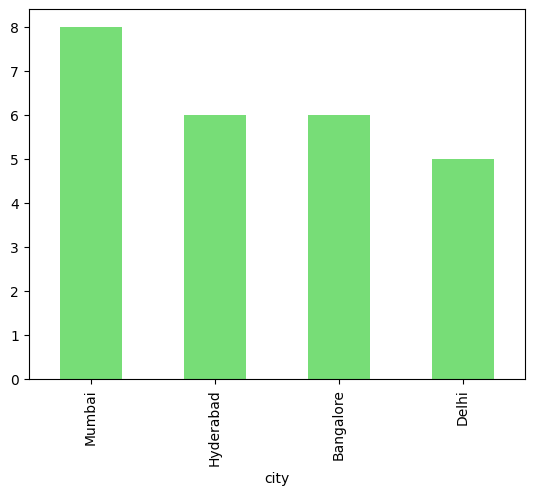

In [180]:
df_hotels.city.value_counts().plot(kind='bar',color = '#77DD77')

#### *Explore the `fact_aggregated_bookings` data.*

In [25]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


#### *Provides an overview of the aggregated bookings dataframe, including data types, using the `Info()` function.*

In [231]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


#### *Displays descriptive statistics for the aggregated bookings data using the `Describe()` function.*

In [26]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


### *1) Find out unique property ids in aggregate bookings dataset.*

In [27]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

### *2) Find out total bookings per property_id.*

In [28]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

### *3) Find out days on which bookings are greater than capacity.*

In [29]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


### *4) Find out properties that have highest capacity.*

In [30]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [31]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

#### *Provides a summary of descriptive statistics for the bookings dataframe using the `Describe()` function.*

In [32]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### *(1) Clean invalid `no_guests.`*

#### *Filters bookings where the `number of guests` is less than or equal to zero.*

In [33]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


- The rows above indicate data errors.
- Given that less than 0.5% of the total data is invalid guest data, we can disregard them when generating insights.

#### *Filters the bookings dataframe to include entries with more than zero guests.*

In [34]:
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [35]:
df_bookings.shape

(134578, 12)

### *(2) Outlier removal in `revenue generated.`*

#### *Calculates the `minimum and maximum` revenue generated in the bookings dataframe.*

In [36]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

#### *Calculates the `mean and median` of the revenue generated in the bookings dataframe.*

In [37]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(15378.036937686695), np.float64(13500.0))

#### *Calculates and displays the `mean and standard deviation` of revenue generated in the bookings dataframe.*

In [38]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

#### *Calculates the `Upper Limit` using the formula: Higher_limit = avg + 3*std.*

In [39]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

#### *Calculates the `Lower Limit` using the formula: Lower_limit = avg - 3*std.*

In [40]:
Lower_limit = avg - 3*std
Lower_limit

np.float64(-263742.4278567056)

#### *We have no values in the revenue realized column that are less than or equal to zero.*

In [41]:
df_bookings[df_bookings.revenue_realized<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


#### *Filters bookings where revenue generated exceeds a specified higher limit.*

In [42]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


- We identified five outliers in the `revenue_generated` column that can be ignored.

#### *Filters the bookings dataframe to include only rows where revenue generated is less than or equal to a specified higher limit, and then displays the shape of the filtered dataframe.*

In [43]:
df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.shape

(134573, 12)

### *Removing outliers in `revenue_realized.`*

#### *Generates summary statistics for the `revenue_realized` in the bookings dataframe.*

In [44]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [45]:
avg, std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
higher_limit = avg + 3*std
lower_limit = avg - 3*std
higher_limit, lower_limit

(np.float64(33479.358661845814), np.float64(-8087.391491611072))

#### *Displays bookings where revenue realized exceeds the `higher limit.`*

In [46]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


#### *Counts the occurrences of room categories in the bookings dataframe where the `revenue_realized` exceeds a specified `higher limit.`*

In [47]:
df_bookings[df_bookings.revenue_realized > higher_limit].room_category.value_counts()

room_category
RT4    1299
Name: count, dtype: int64

- An important observation from the dataframe above is that all rooms are categorized as **RT4**, denoting the **Presidential Suite** type. Given that RT4 signifies luxurious accommodation, it's reasonable to expect higher rental rates for these rooms. To ensure a fair analysis, we should focus our data analysis exclusively on the RT4 room type.

#### *Describes the statistical summary of revenue_realized for room category `'RT4'` in the bookings dataframe.*

In [48]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

#### *Calculates the `mean and standard deviation` of 'revenue_realized' for room category `'RT4'` in the bookings dataframe.*

In [49]:
avg, std = df_bookings[df_bookings.room_category=='RT4'].revenue_realized.mean(), df_bookings[df_bookings.room_category=='RT4'].revenue_realized.std()
avg, std

(np.float64(23439.308443780723), np.float64(9048.599075739918))

In [50]:
higher_limit = avg + 3*std
higher_limit

np.float64(50585.10567100048)

- The upper limit is **50,585** and from our dataframe, we observe that the maximum value for `revenue_realized` is **45,220**. Therefore, we can conclude that there are no outliers, and there is no need for any data cleaning on this column.

#### *Shows the count of `missing values` in each column of the bookings dataframe.*

In [51]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

- The dataframe contains a total of **134,573** values, with **77,897** rows having null ratings. Due to the significant number of null ratings, we shouldn't filter or replace them with median or mean values. Because not every customer provides a rating, it is logical that our `ratings_given` column contains null values.

### Q-1) *In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate substitute (a possible ways is to use mean or median)*

#### *Counts the number of `missing values` in the aggregated bookings dataframe.*

In [52]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

#### *Filters the df_agg_bookings dataframe to show rows where the 'capacity' column is `NaN.`*

In [53]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


#### *Replaces null values in the 'capacity' column of df_agg_bookings using the `mean` value.*

In [56]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].mean())

#### *Indicates rows 8 and 14 from the aggregated bookings dataframe, which previously contained `null values.`*

In [57]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.280496
14,17562,1-May-22,RT1,12,25.280496


### 2) *In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records*

#### *Filters aggregated bookings where the number of successful bookings exceeds the capacity.*

In [58]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


- We have identified **6** records in `df_agg_bookings` where the number of `successful_bookings` exceeds the actual `capacity`, indicating the presence of data errors. It is advisable to exclude these rows from the dataframe for more accurate analysis.

#### *Returns the number of rows and columns of the aggregated bookings dataframe before excluding the data errors.*

In [59]:
df_agg_bookings.shape

(9200, 5)

#### *Filters `df_agg_bookings` to include only rows where the number of successful bookings is less than or equal to the capacity.*

In [60]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

#### *Returns the number of rows and columns of the aggregated bookings dataframe after excluding the data errors.*

In [61]:
df_agg_bookings.shape

(9194, 5)

***
### ==> 3. Data Transformation
***

In [62]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


#### *Create a new column to indicate the `occupancy_percentage.`*

In [70]:
df_agg_bookings['Occupancy_pct'] = round(df_agg_bookings['successful_bookings']*100/df_agg_bookings['capacity'],2)

In [71]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00


In [72]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
 5   Occupancy_pct        9194 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 502.8+ KB


- As we can see above, the check_in_date column's data type is object, so we need to convert this to datetime data type.

#### *Converts the `check_in_date` column to datetime format in the df_agg_bookings dataframe.*

In [73]:
df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings['check_in_date'], format='%d-%b-%y')

In [74]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
 5   Occupancy_pct        9194 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 502.8+ KB


- Now, as we can see above, the data type of the `check_in_date` column has been successfully converted to datetime.

***
### ==> 4. Insight Generation and Analysis
***

### Q-1) *What is an average occupancy rate in each of the room categories?*

In [75]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00


#### *Calculates the average occupancy percentage for each room category, rounded to two decimal places.*

In [76]:
df_agg_bookings.groupby('room_category')['Occupancy_pct'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: Occupancy_pct, dtype: float64

In [77]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### *Joins the aggregated bookings data with room details, then previews the first few rows of the combined dataframe.*

In [78]:
df = pd.merge(df_agg_bookings,df_rooms, left_on='room_category', right_on='room_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard
3,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard
4,17560,2022-05-01,RT1,28,40.0,70.00,RT1,Standard


#### *Deletes the `room_id` column from the dataframe `df.`*

In [79]:
df.drop('room_id', axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard


#### *Calculates the average occupancy percentage for each `room_class`, rounded to two decimal places.*

In [80]:
df.groupby('room_class')['Occupancy_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: Occupancy_pct, dtype: float64

#### *Plots a bar chart of the average occupancy percentage, for each `room class.`*

<Axes: xlabel='room_class'>

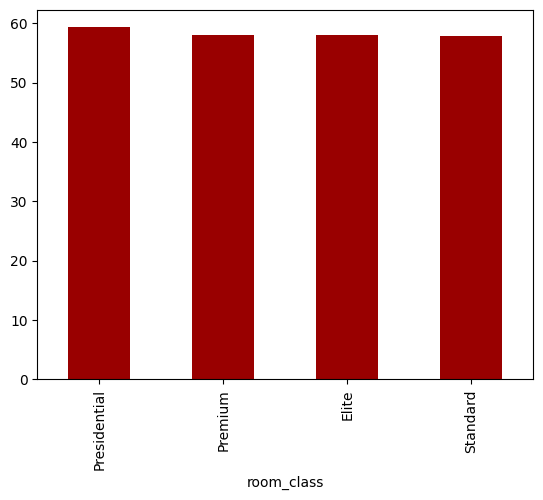

In [177]:
df.groupby('room_class')['Occupancy_pct'].mean().round(2).sort_values(ascending=False).plot(kind='bar', color = '#990000')

### 2) *Print average occupancy rate per city.*

In [82]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


#### *Joins df and df_hotels on `property_id` and displays the first few rows.*

In [83]:
df = pd.merge(df,df_hotels, on='property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,2022-05-01,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


#### *Calculates the average occupancy percentage for each `city.`*

In [84]:
df.groupby('city')['Occupancy_pct'].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.908668
Name: Occupancy_pct, dtype: float64

#### *Plots a pie chart showing the Average occupancy percentage for each `city.`*

<Axes: ylabel='Occupancy_pct'>

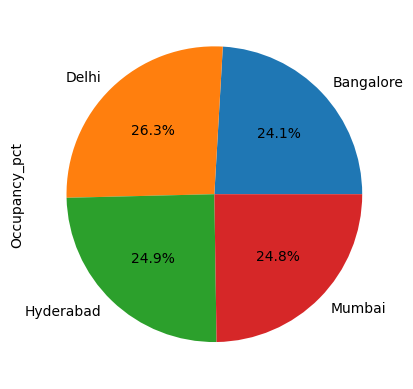

In [85]:
df.groupby('city')['Occupancy_pct'].mean().plot(kind='pie', autopct='%1.1f%%')

### 3) *When was the occupancy better? Weekday or Weekend?*

In [86]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [87]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


- As we can see above, the date column's data type is object, so we need to convert this to datetime data type.

#### *Converts the `date` column to datetime format in the df_date dataframe.*

In [88]:
df_date['date'] = pd.to_datetime(df_date['date'], format='%d-%b-%y')

In [89]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


- Now, as we can see above, the data type of the `date` column has been successfully converted to datetime.

#### *Joins df with df_date on the `check_in_date` and date columns.*

In [90]:
df = pd.merge(df,df_date, left_on='check_in_date', right_on='date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,17560,2022-05-01,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai,2022-05-01,May 22,W 19,weekend


#### *Calculates the mean occupancy percentage by `day_type`, rounded to two decimal places.*

In [91]:
df.groupby('day_type')['Occupancy_pct'].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: Occupancy_pct, dtype: float64

### 4) *In the month of June, what is the occupancy for different cities?*

#### *Filters the dataframe to include data only for `June 2022.`*

In [92]:
df_june_22 = df[df['mmm yy'] == 'Jun 22']
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3098,16559,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3099,18560,2022-06-01,RT1,18,30.0,60.00,Standard,Atliq City,Business,Hyderabad,2022-06-01,Jun 22,W 23,weekeday
3100,19562,2022-06-01,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,2022-06-01,Jun 22,W 23,weekeday
3101,19563,2022-06-01,RT1,14,30.0,46.67,Standard,Atliq Palace,Business,Bangalore,2022-06-01,Jun 22,W 23,weekeday
3102,17558,2022-06-01,RT1,8,19.0,42.11,Standard,Atliq Grands,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday


#### *Calculates and sorts the average occupancy percentages by `city` in descending order.*

In [93]:
df_june_22.groupby('city')['Occupancy_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: Occupancy_pct, dtype: float64

#### *Generates a bar plot of the average occupancy percentage by city, sorted in descending order, using June 2022 data.*

<Axes: xlabel='city'>

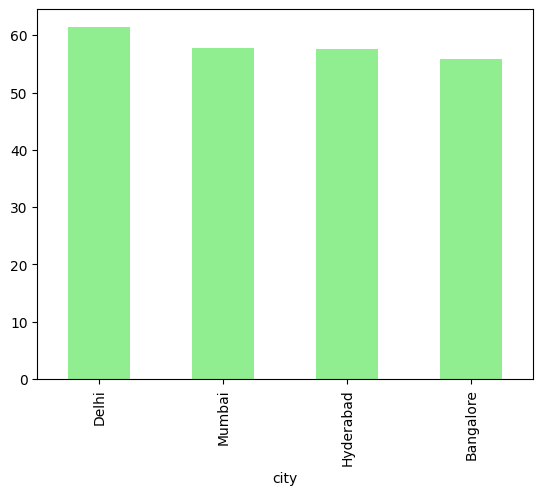

In [170]:
df_june_22.groupby('city')['Occupancy_pct'].mean().round(2).sort_values(ascending=False).plot(kind='bar',color = '#90EE90')

### 5) *We have received new data for the month of `August` Append that to the existing data.*

In [96]:
df_august = pd.read_csv('datasets/new_data_august.csv')
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [97]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [98]:
df_august.shape

(7, 13)

In [99]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'Occupancy_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [100]:
df.shape

(9194, 14)

#### *Concatenates 'df' and 'df_august' into `latest_df`, resetting the index to maintain continuity.*

In [101]:
latest_df = pd.concat([df,df_august], ignore_index=True, axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9191,17558,2022-07-31 00:00:00,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,2022-07-31,Jul 22,W 32,weekend,NaN
9192,19563,2022-07-31 00:00:00,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,2022-07-31,Jul 22,W 32,weekend,NaN
9193,17561,2022-07-31 00:00:00,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,2022-07-31,Jul 22,W 32,weekend,NaN
9194,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,100.00
9195,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,70.00
9196,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.67
9197,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,75.00
9198,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.92
9199,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,69.23
9200,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaT,Aug-22,W 32,weekeday,62.50


#### *Calculates and rounds the `occupancy_percentage` based on successful bookings and capacity in the latest dataframe.*

In [102]:
latest_df['Occupancy_pct'] = round(latest_df['successful_bookings']*100/latest_df['capacity'],2)
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9196,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.67
9197,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,75.00
9198,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.92
9199,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,69.23
9200,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,NaT,Aug-22,W 32,weekeday,62.50


#### *Drops the `occ%` column from the latest_df dataframe.*

In [103]:
latest_df.drop(columns=['occ%'], inplace=True)
latest_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01 00:00:00,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01 00:00:00,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01 00:00:00,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,16558,2022-05-01 00:00:00,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,17560,2022-05-01 00:00:00,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai,2022-05-01,May 22,W 19,weekend


In [104]:
latest_df.shape

(9201, 14)

### 6) *Print revenue realized per city.*

In [105]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [106]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


#### *Merges the df_bookings and df_hotels dataframes on `property_id` to create `df_bookings_all.`*

In [107]:
df_bookings_all = pd.merge(df_bookings,df_hotels, on='property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


#### *Calculates and sorts the total `revenue_realized` by `city` in descending order from the df_bookings_all dataset.*

In [108]:
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

#### *Plots a bar chart showing the total revenue_realized by `city.`*

<Axes: xlabel='city'>

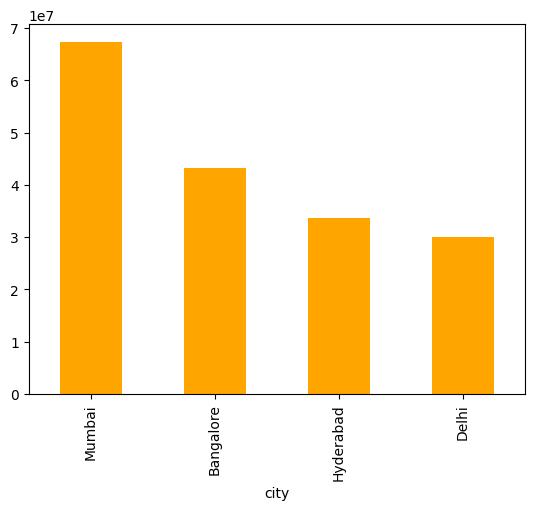

In [166]:
df_bookings_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')

### 7) *Print month by month revenue.*

In [114]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [115]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [116]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [117]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

- As we can see above, the check_in_date column's data type is an `object`, so we need to convert this to a `datetime` data type.

#### *Converts the `check_in_date` column in df_bookings_all to `datetime` format, handling errors by coercing invalid dates.*

In [118]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors='coerce')

In [119]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

- Now, as we can see above, the data type of the `check_in_date` column has been successfully converted to datetime.

#### *Joins the bookings dataframe df_bookings_all with the date dataframe df_date using the `check_in_date` and `date` columns.*

In [120]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on='check_in_date', right_on='date')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


#### *Calculates the aggregate `revenue_realized` for `each month`.*

In [121]:
df_bookings_all.groupby(['mmm yy'])['revenue_realized'].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

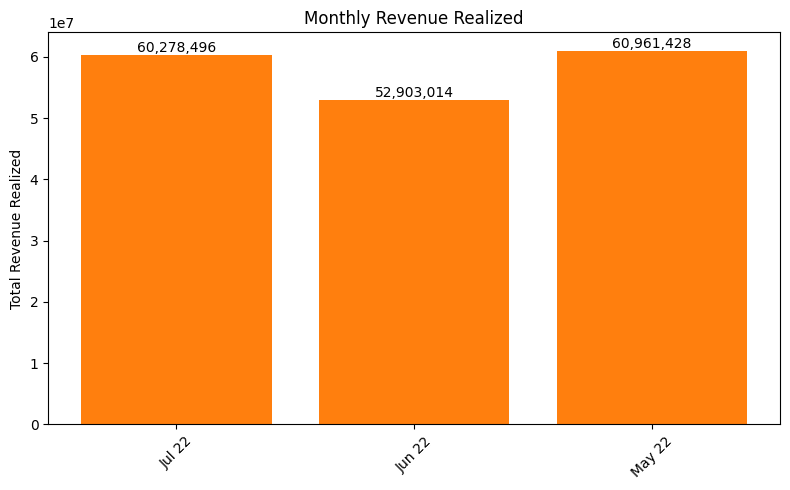

In [163]:
import matplotlib.pyplot as plt

# Grouping and summing revenue by month
monthly_revenue = df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

# Plotting vertical bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(monthly_revenue.index, monthly_revenue.values, color='#ff7f0e')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue Realized')
plt.title('Monthly Revenue Realized')

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 8) *Print revenue realized per hotel type.*

In [122]:
df_bookings_all['property_name'].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

#### *Displays the total `revenue_realized` for each `property`, sorted in descending order.*

In [123]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False)

property_name
Atliq Exotica    32436799
Atliq Palace     30945855
Atliq City       29047727
Atliq Bay        26936115
Atliq Blu        26459751
Atliq Grands     21644446
Atliq Seasons     6672245
Name: revenue_realized, dtype: int64

#### *Plots the total revenue_realized by property name in a bar chart.*

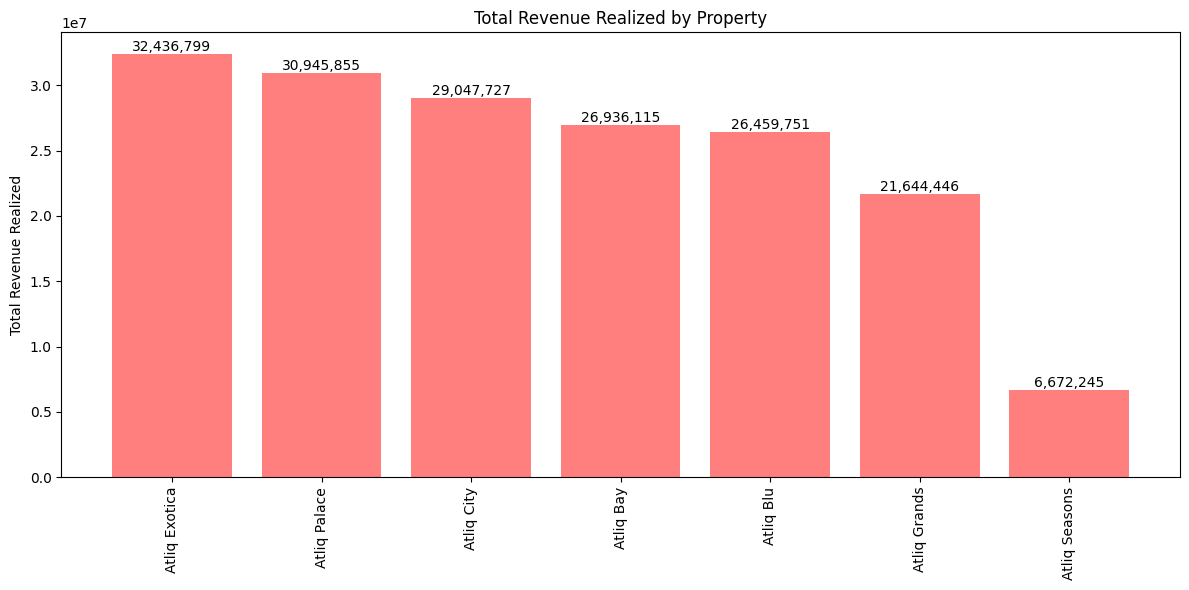

In [164]:
import matplotlib.pyplot as plt

# Grouping and summing revenue
revenue_by_property = df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False)

# Plotting vertical bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_by_property.index, revenue_by_property.values, color='#FF7F7F')
plt.xticks(rotation=90)
plt.ylabel('Total Revenue Realized')
plt.title('Total Revenue Realized by Property')

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 9) *Print average rating per city.*

In [133]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


#### *Calculates the Average ratings by `city`, rounds to two decimal places, and ranks them from highest to lowest.*

In [134]:
df_bookings_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.79
Hyderabad    3.65
Mumbai       3.63
Bangalore    3.41
Name: ratings_given, dtype: float64

#### *Plots the `Average ratings` given by `Cities` in a horizontal bar chart.*

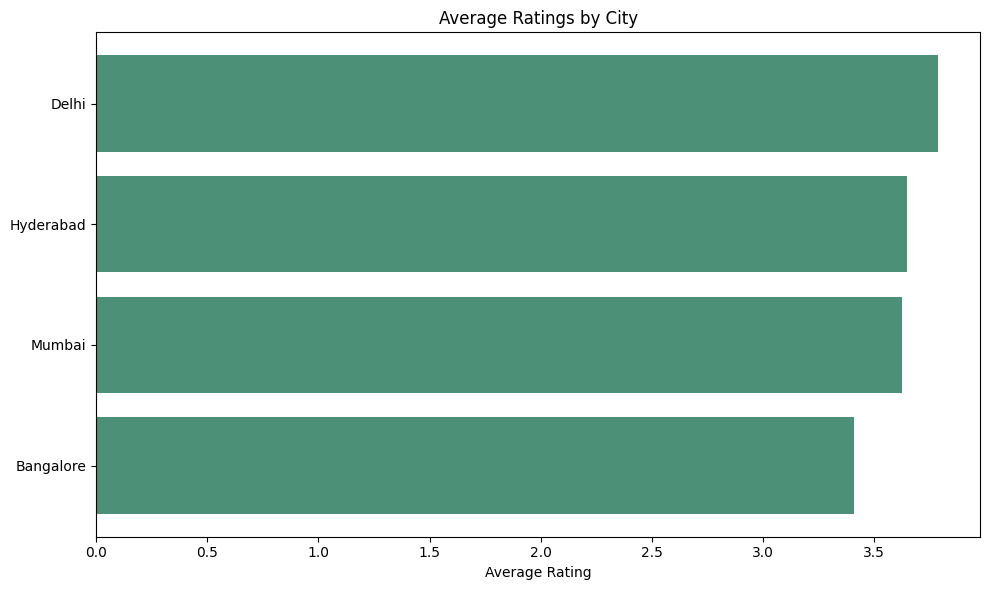

In [149]:
# Grouping and calculating average ratings
avg_ratings = df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

# Sorting the data for better visualization
avg_ratings = avg_ratings.sort_values(ascending=True)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(avg_ratings.index, avg_ratings.values, color='#4D9078')
plt.xlabel('Average Rating')
plt.title('Average Ratings by City')
plt.tight_layout()
plt.show()

### 10) *Print a pie chart of revenue realized per booking platform.*

In [137]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().sort_values(ascending=False)

booking_platform
others            72310965
makeyourtrip      34034257
logtrip           18605339
direct online     17488976
tripster          11959078
journey           10757858
direct offline     8986465
Name: revenue_realized, dtype: int64

#### *Visualizes the total `revenue realized` by each `booking platform` in a pie chart.*

<Axes: ylabel='revenue_realized'>

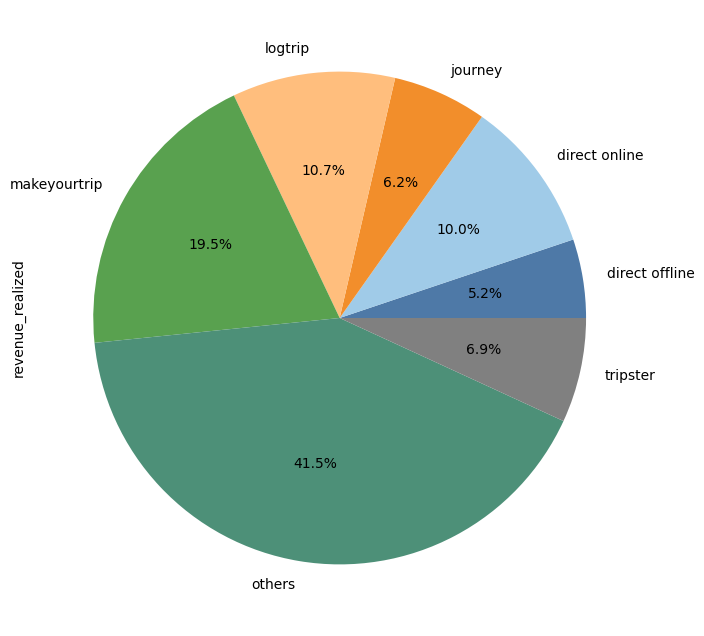

In [143]:
colors = ['#4E79A7', '#A0CBE8', '#F28E2B', '#FFBE7D', '#59A14F', '#4D9078', '#808080']

df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(
    kind="pie",
    colors=colors,
    autopct='%1.1f%%',
    figsize=(8, 8)
)